In [1]:
import pandas as pd
import sys
import numpy as np
from pandas import DataFrame
from sklearn.model_selection import train_test_split, KFold
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.cluster import KMeans

import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import seaborn as sns

from scipy.stats.stats import pearsonr
from math import sqrt
import statistics 
from scipy.stats import *
from scipy.spatial import distance

############################################################
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

from matplotlib.colors import ListedColormap
from matplotlib import cm
import geopandas as gpd

print("Repositories uploaded!!")

Repositories uploaded!!


In [2]:
us_df = pd.read_csv("US_data/US_2018/US.csv")

In [3]:
import pyreadr

us_df = pyreadr.read_r("US_data/US2018_rds/train_CUS_2018_EPA.rds")
us_df = us_df[None]

In [4]:
us_df

,maiac_id,Date,PM25,doy,AOD.final,gap.fill,PM_IDW,Smoke_IDW,cloud,temp_2m,...,wetland,highway,primary_road,secondary_road,tertiary_road,local_road,elevation,yr,CLIMATE_ID,station
0,1063157,2018-01-01,6.40,1,0.070401,1.0,3.410593,0.218314,86.0,284.274551,...,0.006283,0.000000,0.000000,281.689103,0.0,630.799053,545.253061,2018,NW,EPA
1,1089476,2018-01-01,6.70,1,0.116380,1.0,15.821095,1.747556,100.0,286.978942,...,0.004202,0.000000,0.000000,1033.498602,0.0,4730.875874,274.268852,2018,NW,EPA
2,1107497,2018-01-01,22.10,1,0.095919,1.0,10.089548,0.518724,100.0,286.920883,...,0.000000,0.000000,0.000000,913.142741,0.0,10173.570511,428.626337,2018,NW,EPA
3,1111061,2018-01-01,5.50,1,0.109611,1.0,13.520669,8.713234,98.0,286.719025,...,0.196429,0.000000,0.000000,1692.467921,0.0,0.000000,357.150820,2018,NW,EPA
4,1124291,2018-01-01,9.50,1,0.071831,1.0,4.121344,0.095862,66.0,285.173907,...,0.000000,0.000000,0.000000,2719.435177,0.0,12495.276462,603.967159,2018,NW,EPA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
340291,20635601,2018-12-31,7.20,365,0.107504,1.0,6.938404,0.002606,100.0,263.964581,...,0.010406,0.000000,0.000000,879.505959,0.0,4747.561185,151.369383,2018,NE,EPA
340292,20638001,2018-12-31,7.10,365,0.102999,1.0,6.902451,0.002511,100.0,264.005983,...,0.000000,0.000000,744.957347,3766.226823,0.0,8614.392838,150.198171,2018,NE,EPA
340293,20905346,2018-12-31,12.00,365,0.104183,1.0,11.523903,0.004561,100.0,270.794650,...,0.000000,796.241581,1122.692793,454.798605,0.0,7834.492958,44.177305,2018,NE,EPA
340294,20908945,2018-12-31,11.60,365,0.110349,1.0,9.423153,0.006209,100.0,270.845605,...,0.001075,0.000000,1812.117803,2232.073910,0.0,6265.222681,16.588652,2018,NE,EPA


In [16]:
us_df.sort_values(by=['PM25'])

,maiac_id,Date,PM25,doy,AOD.final,gap.fill,PM_IDW,Smoke_IDW,cloud,temp_2m,...,wetland,highway,primary_road,secondary_road,tertiary_road,local_road,elevation,yr,CLIMATE_ID,station
330271,5995696,2018-12-21,0.1,355,0.108701,1.0,2.744109,0.086186,100.0,271.497543,...,0.002088,0.0,0.000000,0.000000,0.000000,6281.489987,917.750554,2018,WNC,EPA
279526,1645802,2018-10-28,0.1,301,0.052056,0.0,5.147240,0.000112,58.0,297.700378,...,0.000000,0.0,0.000000,6266.686002,0.000000,12934.584082,17.312772,2018,W,EPA
87762,6054304,2018-04-05,0.1,95,0.147367,1.0,3.702740,0.000495,100.0,279.300070,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,1207.782738,2018,WNC,EPA
12324,5991643,2018-01-14,0.1,14,0.083254,1.0,1.503668,0.001744,86.0,276.292339,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,1403.193501,2018,NW,EPA
128815,6212810,2018-05-19,0.1,139,0.229528,1.0,0.516123,0.002056,100.0,281.863614,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,1213.856383,2018,WNC,EPA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296291,1564281,2018-11-15,285.0,319,1.124750,0.0,70.190573,52.476942,100.0,290.490988,...,0.001046,0.0,1038.286539,3422.804442,0.000000,11496.598788,23.141379,2018,W,EPA
214623,3250631,2018-08-19,295.8,231,2.108000,0.0,39.698067,23.384155,4.0,303.874225,...,0.000000,0.0,0.000000,1180.559615,0.000000,9039.585290,257.488705,2018,NW,EPA
296280,1474361,2018-11-15,299.9,319,1.269750,0.0,71.092743,59.971255,100.0,293.738317,...,0.000000,0.0,0.000000,2245.693202,0.000000,8132.878020,61.994872,2018,W,EPA
214612,3191933,2018-08-19,389.0,231,2.457000,0.0,27.084598,5.504059,34.0,303.265603,...,0.000000,0.0,923.617180,0.000000,518.966631,4017.979289,340.533930,2018,NW,EPA


In [11]:
us_df.maiac_id.nunique()

1275

In [13]:
340296.0/1275.0

266.89882352941174

In [20]:
us_df.isnull().sum()

maiac_id          0
Date              0
PM25              0
doy               0
AOD.final         0
gap.fill          0
PM_IDW            0
Smoke_IDW         0
cloud             0
temp_2m           0
humidity_2m       0
sur_pressure      0
U_wind            0
V_wind            0
long_rf           0
short_rf          0
precipitation     0
evaporation       0
hpbl              0
avg_den           0
total_duration    0
population        0
water             0
developed         0
barren            0
forest            0
shrubland         0
herbaceous        0
cultivated        0
wetland           0
highway           0
primary_road      0
secondary_road    0
tertiary_road     0
local_road        0
elevation         0
yr                0
CLIMATE_ID        0
station           0
dtype: int64

In [16]:
us_df.columns

Index(['maiac_id', 'Date', 'PM25', 'doy', 'AOD.final', 'gap.fill', 'PM_IDW',
       'Smoke_IDW', 'cloud', 'temp_2m', 'humidity_2m', 'sur_pressure',
       'U_wind', 'V_wind', 'long_rf', 'short_rf', 'precipitation',
       'evaporation', 'hpbl', 'avg_den', 'total_duration', 'population',
       'water', 'developed', 'barren', 'forest', 'shrubland', 'herbaceous',
       'cultivated', 'wetland', 'highway', 'primary_road', 'secondary_road',
       'tertiary_road', 'local_road', 'elevation', 'yr', 'CLIMATE_ID',
       'station'],
      dtype='object')

In [4]:
us_df = us_df.drop(['ID', 'Date'], axis = 1)


,PM25,X,Y,Region,Lon,Lat,Hour,CF_CLDTT,CF_PS,CF_Q,...,LC_Water,LC_Wetland,LC_Lichen,LC_Closed_Forest,LC_Open_Forest,LC_Ocean,Elevation,Dist_Primary,Dist_Secondary,Pop
0,1.400000,1.567567e+06,-1.382348e+06,Florida,-80.682187,25.390882,12,0.822249,101780.661168,0.011500,...,0.0,0.15,0,0.0,0.00,0.0,1,345375.639808,351276.487109,4.000000
1,7.300000,1.567567e+06,-1.382348e+06,Florida,-80.682187,25.390882,12,0.159620,102586.017791,0.002888,...,0.0,0.15,0,0.0,0.00,0.0,1,345375.639808,351276.487109,4.000000
2,3.500000,1.567567e+06,-1.382348e+06,Florida,-80.682187,25.390882,12,0.913732,101890.108699,0.010582,...,0.0,0.15,0,0.0,0.00,0.0,1,345375.639808,351276.487109,4.000000
3,2.100000,1.567567e+06,-1.382348e+06,Florida,-80.682187,25.390882,12,0.021333,101573.233407,0.013026,...,0.0,0.15,0,0.0,0.00,0.0,1,345375.639808,351276.487109,4.000000
4,5.100000,1.567567e+06,-1.382348e+06,Florida,-80.682187,25.390882,12,0.631767,102309.789219,0.007090,...,0.0,0.15,0,0.0,0.00,0.0,1,345375.639808,351276.487109,4.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
694181,3.916667,-1.936102e+06,1.367174e+06,Washington,-122.453848,48.756062,12,0.994987,99902.130697,0.004372,...,0.0,0.00,0,0.0,0.17,0.0,55,1812.713641,1048.631404,1049.833333
694182,5.916667,-1.936102e+06,1.367174e+06,Washington,-122.453848,48.756062,12,0.989416,99964.743684,0.004428,...,0.0,0.00,0,0.0,0.17,0.0,55,1812.713641,1048.631404,1049.833333
694183,3.791667,-1.936102e+06,1.367174e+06,Washington,-122.453848,48.756062,12,0.958669,99561.566242,0.004872,...,0.0,0.00,0,0.0,0.17,0.0,55,1812.713641,1048.631404,1049.833333
694184,4.450000,-1.936102e+06,1.367174e+06,Washington,-122.453848,48.756062,12,0.965298,100449.298089,0.005202,...,0.0,0.00,0,0.0,0.17,0.0,55,1812.713641,1048.631404,1049.833333


In [5]:
target_col = ['PM25']
us_target = us_df[target_col]

In [6]:
us_features = us_df.drop(target_col, axis = 1)

In [7]:
us_features = us_df.drop(['Region'], axis = 1)

In [8]:
us_features_np = us_features.to_numpy()

In [9]:
us_features_np

array([[ 1.40000000e+00,  1.56756733e+06, -1.38234840e+06, ...,
         3.45375640e+05,  3.51276487e+05,  4.00000000e+00],
       [ 7.30000000e+00,  1.56756733e+06, -1.38234840e+06, ...,
         3.45375640e+05,  3.51276487e+05,  4.00000000e+00],
       [ 3.50000000e+00,  1.56756733e+06, -1.38234840e+06, ...,
         3.45375640e+05,  3.51276487e+05,  4.00000000e+00],
       ...,
       [ 3.79166700e+00, -1.93610222e+06,  1.36717353e+06, ...,
         1.81271364e+03,  1.04863140e+03,  1.04983333e+03],
       [ 4.45000000e+00, -1.93610222e+06,  1.36717353e+06, ...,
         1.81271364e+03,  1.04863140e+03,  1.04983333e+03],
       [ 1.08333300e+00, -1.93610222e+06,  1.36717353e+06, ...,
         1.81271364e+03,  1.04863140e+03,  1.04983333e+03]])

In [29]:
new_us_feature_np = []
for row in us_features_np:
    row = np.append(row, [0.0, 0.0, 0.0, 0.0, 0.0, 0.0], axis = 0)
    row = np.reshape(row, (7,7))
    new_us_feature_np.append(row)

# test_arr = us_features_np[0]
# test_arr = np.append(test_arr, [0.0, 0.0, 0.0, 0.0, 0.0, 0.0], axis = 0)
# mat = np.reshape(test_arr, (7,7))

In [199]:
# new_us_feature_np

In [15]:
df_pm25 = pd.read_csv("TL_data/cnn/national_pm_fit_2011_2.csv")

In [16]:
df_pm25

,year,day,pm_id,pm_x,pm_y,elev,emissi11_nh3,emissi11_nox,emissi11_pm10,emissi11_pm25,...,emissi11_pm25_k,emissi11_so2_k,emissi11_voc_k,forest_cover_k,high_k,limi_k,local_k,is_k,pd_k,pm25_value_k
0,2011,1,04-013-0019,-1.482817e+06,1.283559e+06,335.05000,0.0,0.0000,0.0000,0.0000,...,0.006685,0.045889,0.010094,0.081755,2.597740,0.760009,706.628717,48.485954,2298.674505,53.798675
1,2011,1,04-013-4003,-1.478211e+06,1.273627e+06,328.53800,0.0,0.0059,0.0061,0.0053,...,0.006831,0.050215,0.009899,0.139030,2.872537,0.819412,298.419838,40.405068,2332.207255,46.541340
2,2011,1,04-013-9812,-1.481670e+06,1.276859e+06,320.75100,0.0,0.0000,0.0000,0.0000,...,0.004930,0.026981,0.008386,0.261781,1.522438,0.439642,740.315858,35.483232,1907.864992,67.350520
3,2011,1,04-013-9997,-1.478184e+06,1.285020e+06,343.17500,0.0,0.0000,0.0000,0.0000,...,0.006829,0.047207,0.010295,0.054528,2.668100,0.775474,848.492734,48.910374,2218.766246,80.140130
4,2011,1,06-073-1010,-1.955330e+06,1.288471e+06,7.56196,0.0,0.0000,0.0000,0.0000,...,0.110819,0.244195,0.468707,0.024268,43.457382,129.738090,1633.111091,60.363106,1844.398373,25.175883
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80338,2011,365,48-453-0020,-1.793889e+05,8.247919e+05,321.27600,0.0,0.0000,0.0000,0.0000,...,0.368405,2.669036,0.871735,0.081703,37.214223,34.156520,1199.830479,34.986527,1390.936038,18.252366
80339,2011,365,48-479-0313,-3.503443e+05,5.102627e+05,136.67300,0.0,0.0000,0.0000,0.0000,...,1.309024,12.112736,3.634646,0.138486,191.914415,135.805455,882.621441,30.235081,817.604938,19.019530
80340,2011,365,48-485-0315,-2.362037e+05,1.202863e+06,311.68100,0.0,0.0000,0.0000,0.0000,...,1.316376,10.449621,2.615909,0.133959,206.733474,89.933521,889.829639,27.662831,793.776363,9.145256
80341,2011,365,53-003-0004,-1.610021e+06,2.783181e+06,230.41700,0.0,0.0059,0.0061,0.0053,...,0.028062,0.161084,0.040520,0.040790,42.660233,6.646778,203.548376,7.263768,308.676813,4.348798


In [19]:
col_list = df_pm25.columns
col_list

Index(['year', 'day', 'pm_id', 'pm_x', 'pm_y', 'elev', 'emissi11_nh3',
       'emissi11_nox', 'emissi11_pm10', 'emissi11_pm25',
       ...
       'emissi11_pm25_k', 'emissi11_so2_k', 'emissi11_voc_k', 'forest_cover_k',
       'high_k', 'limi_k', 'local_k', 'is_k', 'pd_k', 'pm25_value_k'],
      dtype='object', length=151)

In [1]:
from matplotlib.colors import ListedColormap
from matplotlib import cm
import geopandas as gpd


df_sensors = df_pm25[['lon', 'lat', 'pm25_value']].copy()
df_sensors = df_sensors.reset_index(drop = True)

fig, ax = plt.subplots(figsize = (20,16))


us_map = gpd.read_file("ShapeFolder/States_shapefile-shp/States_shapefile.shp")
us_map = us_map[us_map['State_Name'] != 'ALASKA']
us_map = us_map[us_map['State_Name'] != 'HAWAII']
us_map.plot(color = "lightgrey", ax = ax)

rainbow_colors = ListedColormap(['#0000ff', '#0054ff', '#00abff', '#00ffff', '#54ffab', '#abff53', '#ffff00', '#ffaa00', '#ff5400', '#ff0000'])
viridis = cm.get_cmap('viridis', 12)
df_sensors.plot(x = "lon", y = "lat", kind = "scatter", cmap = viridis, ax = ax)

# ax.grid(b = True, alpha = 0.5)

##### get axes limits
x_lo, x_up = ax.get_xlim()
y_lo, y_up = ax.get_ylim()

##### add minor ticks with a specified sapcing (deg)
deg = 1
ax.set_xticks(np.arange(np.ceil(x_lo), np.ceil(x_up), deg), minor = True)
ax.set_yticks(np.arange(np.ceil(y_lo), np.ceil(y_up), deg), minor = True)
ax.grid(b = True, which = "minor", alpha = 0.25)
ax.set_xlabel("Longitude", fontsize = 15)
ax.set_ylabel("Latitude", fontsize = 15)
# ax.legend(fontsize = "small")
plt.show()


NameError: name 'df_pm25' is not defined

Min Value:  -1.9
Max Value:  136.8


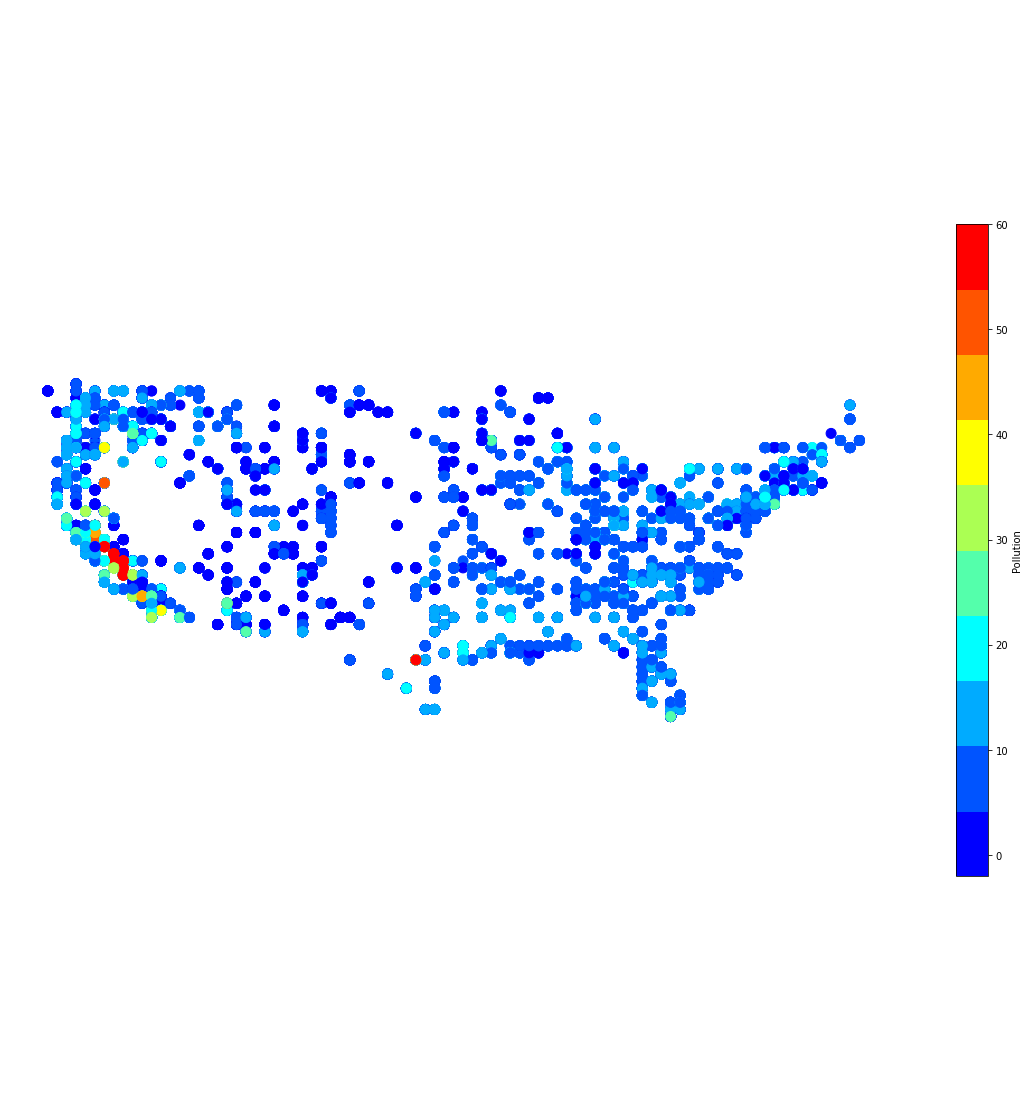

In [27]:
###################### Map Plot ######################
from matplotlib.colors import ListedColormap
from matplotlib import cm
import geopandas as gpd

df_sensors = df_pm25[['lon', 'lat', 'pm25_value']].copy()
df_sensors = df_sensors.reset_index(drop = True)

print("Min Value: ",df_sensors['pm25_value'].min())
print("Max Value: ",df_sensors['pm25_value'].max())

fig, axs = plt.subplots(figsize = (20, 20))

rainbow_colors = ListedColormap(['#0000ff', '#0054ff', '#00abff', '#00ffff', '#54ffab', '#abff53', '#ffff00', '#ffaa00', '#ff5400', '#ff0000']) #Using VIBGYOR for colors
viridis = cm.get_cmap('viridis', 12)
qualitative = cm.get_cmap('tab10')



df_sensors_map = gpd.GeoDataFrame(df_sensors, geometry = gpd.points_from_xy(df_sensors.lon, df_sensors.lat)) #Create a geodataframe
df_sensors_map.plot(column = 'pm25_value', ax = axs, cmap = rainbow_colors, legend = True, legend_kwds = {'label': "Pollution", 'shrink': 0.6}, 
                   vmin= -2, vmax= 60, markersize = 100) #Plot the geodatframe

axs.axis('off') # 4
plt.axis('equal') # 5

# plt.savefig("US_source_1_plot")
plt.show()

In [20]:
for el in col_list:
    print(el)

year
day
pm_id
pm_x
pm_y
elev
emissi11_nh3
emissi11_nox
emissi11_pm10
emissi11_pm25
emissi11_so2
emissi11_voc
forest_cover
high
limi
local
is
pd
lon
lat
pm25_value
nldas_pevapsfc
nldas_dlwrfsfc
nldas_dswrfsfc
nldas_cape
nldas_fpcsfc
nldas_pcpsfc
nldas_rh2m
nldas_tmp2m
nldas_vgrd10m
nldas_ugrd10m
nldas_pressfc
narr_dpt
narr_vis
narr_hpbl
narr_rh2m
narr_tmp2m
narr_ugrd10m
narr_vgrd10m
narr_rh30mb
narr_rh63mb
narr_rh96mb
narr_rh129mb
narr_rh1512mb
narr_rh1815mb
narr_tmp30mb
narr_tmp63mb
narr_tmp96mb
narr_tmp129mb
narr_tmp1512mb
narr_tmp1815mb
narr_ugrd30m
narr_ugrd30mb
narr_ugrd63mb
narr_ugrd96mb
narr_ugrd129mb
narr_ugrd1512mb
narr_ugrd1815mb
narr_vgrd30m
narr_vgrd30mb
narr_vgrd63mb
narr_vgrd96mb
narr_vgrd129mb
narr_vgrd1512mb
narr_vgrd1815mb
narr_pres2m
narr_pres10m
narr_pres30m
narr_tmp10m
narr_tmp30m
narr_sph30mb
narr_sph63mb
narr_sph96mb
narr_sph129mb
narr_sph1512mb
narr_sph1815mb
narr_tmpsfc
narr_potsfc
narr_pwateatm
narr_evpsfc
narr_pratesfc
narr_apcpsfc
narr_acpcpsfc
narr_snosfc
na

In [13]:
df_pm25[['pm_x','pm_y','lon','lat']]

,pm_x,pm_y,lon,lat
0,-1.482817e+06,1.283559e+06,-112.00000,33.5
1,-1.478211e+06,1.273627e+06,-112.00000,33.5
2,-1.481670e+06,1.276859e+06,-112.00000,33.5
3,-1.478184e+06,1.285020e+06,-112.00000,33.5
4,-1.955330e+06,1.288471e+06,-117.33334,32.5
...,...,...,...,...
80338,-1.793889e+05,8.247919e+05,-98.00000,30.5
80339,-3.503443e+05,5.102627e+05,-99.33334,27.5
80340,-2.362037e+05,1.202863e+06,-98.66666,34.0
80341,-1.610021e+06,2.783181e+06,-117.33334,46.5


In [81]:
df_BUS = pd.read_csv("US_data/BigUS/n_aod_pred_2011_new10_1.csv")
df_BUS = df_BUS[df_BUS['day'] == 1]
df_BUS

,year,day,cmaq_x,cmaq_y,elev,emissi11_pm25,forest_cover,high,limi,local,...,narr_vgrd1512mb,narr_vgrd1815mb,narr_tmp30m,narr_pres2m,narr_pres10m,narr_pres30m,aod_value,pm25_value,gc_aod,pm25_value_k
0,2011,1,-1.546318e+05,3.231663e+05,10.23680,0.0,0.039216,0.000000,0.000000,831.897438,...,-3.889840,-3.402230,298.071,98985.8,98882.1,98706.3,NaN,NaN,0.042317,7.278867
1,2011,1,-1.427332e+05,3.230424e+05,4.38882,0.0,0.007346,0.000000,0.000000,1634.444946,...,-3.889840,-3.402230,298.071,98985.8,98882.1,98706.3,NaN,NaN,0.042317,7.111352
2,2011,1,-1.783152e+05,3.350347e+05,17.82310,0.0,0.106520,1078.597982,0.000000,306.127464,...,-1.387240,0.222773,294.696,101352.0,101249.0,101040.0,NaN,NaN,0.023270,7.721335
3,2011,1,-1.664153e+05,3.349110e+05,12.61300,0.0,0.047750,0.000000,0.000000,0.000000,...,-1.173700,0.379023,295.571,101419.0,101315.0,101073.0,NaN,NaN,0.042317,7.491351
4,2011,1,-1.545156e+05,3.347886e+05,8.23616,0.0,0.211230,0.000000,0.000000,1009.069365,...,-1.173700,0.379023,295.571,101419.0,101315.0,101073.0,NaN,NaN,0.042317,7.282235
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53802,2011,1,-1.949187e+06,3.151649e+06,20.80090,0.0,0.038568,0.000000,638.847016,1318.192756,...,1.110160,1.756630,287.446,101252.0,101149.0,100906.0,NaN,NaN,0.005140,14.281443
53803,2011,1,-1.937151e+06,3.151584e+06,14.53420,0.0,0.037649,0.000000,0.000000,0.000000,...,1.110160,1.756630,287.446,101252.0,101149.0,100906.0,NaN,NaN,0.005140,14.270270
53804,2011,1,-1.925112e+06,3.151519e+06,20.15010,0.0,0.047237,75.654009,0.000000,0.000000,...,1.110160,1.756630,287.446,101252.0,101149.0,100906.0,NaN,NaN,0.001153,14.258825
53805,2011,1,-1.913073e+06,3.151452e+06,181.00500,0.0,0.853806,0.000000,0.000000,0.000000,...,0.644012,1.535270,286.154,97019.2,96915.4,96673.0,NaN,NaN,0.001153,14.247107


In [83]:
df_BUS.columns

Index(['year', 'day', 'cmaq_x', 'cmaq_y', 'elev', 'emissi11_pm25',
       'forest_cover', 'high', 'limi', 'local', 'is', 'pd', 'lon', 'lat',
       'rid', 'elev_k', 'emissi11_pm25_k', 'emissi11_pm10_k', 'forest_cover_k',
       'high_k', 'limi_k', 'local_k', 'is_k', 'pd_k', 'cmaq_id',
       'nldas_pevapsfc', 'nldas_dlwrfsfc', 'nldas_dswrfsfc', 'nldas_cape',
       'nldas_fpcsfc', 'nldas_pcpsfc', 'nldas_rh2m', 'nldas_tmp2m',
       'nldas_vgrd10m', 'nldas_ugrd10m', 'nldas_pressfc', 'narr_dpt',
       'narr_vis', 'narr_hpbl', 'narr_rh2m', 'narr_tmp2m', 'narr_ugrd10m',
       'narr_vgrd10m', 'narr_rh30mb', 'narr_rh63mb', 'narr_rh96mb',
       'narr_rh129mb', 'narr_rh1512mb', 'narr_rh1815mb', 'narr_tmp30mb',
       'narr_tmp63mb', 'narr_tmp96mb', 'narr_tmp129mb', 'narr_tmp1512mb',
       'narr_tmp1815mb', 'narr_ugrd30m', 'narr_ugrd30mb', 'narr_ugrd63mb',
       'narr_ugrd96mb', 'narr_ugrd129mb', 'narr_ugrd1512mb', 'narr_ugrd1815mb',
       'narr_vgrd30m', 'narr_vgrd30mb', 'narr_vgrd63mb',

In [87]:
df_BUS = df_BUS.head(5000)
df_BUS.shape

(5000, 77)

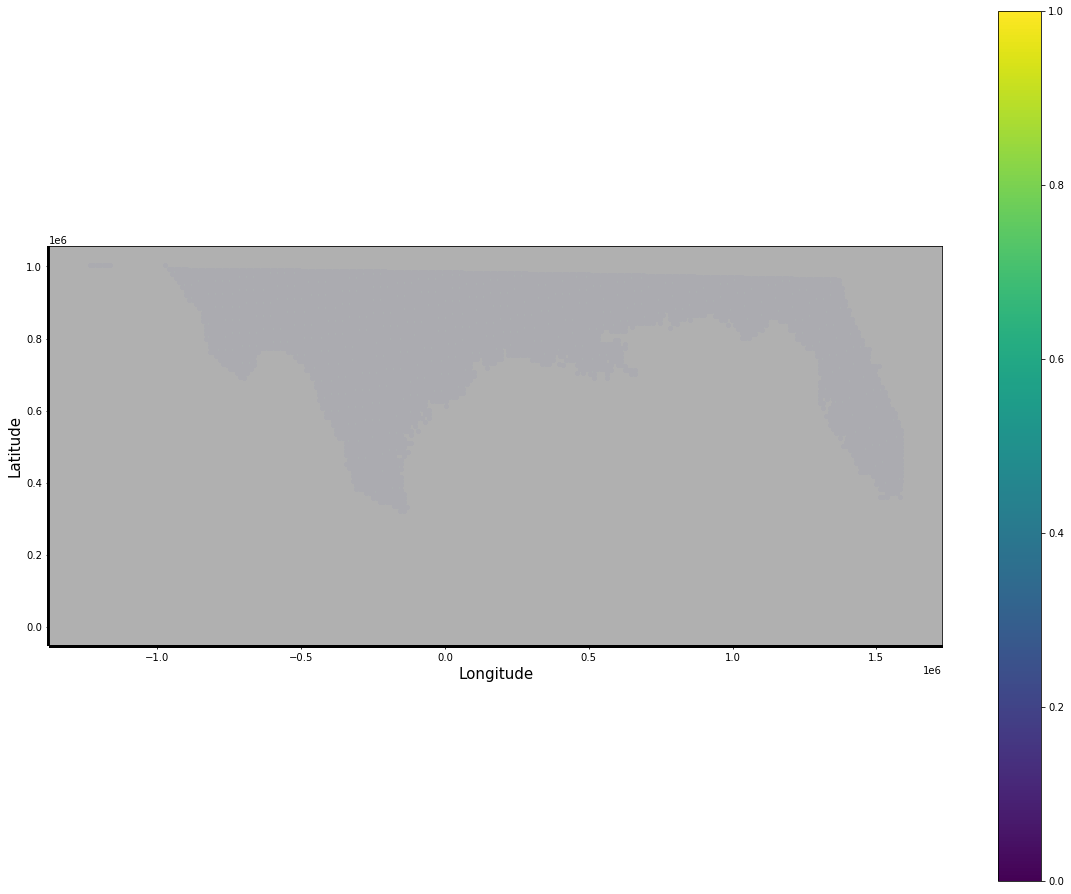

In [88]:
from matplotlib.colors import ListedColormap
from matplotlib import cm
import geopandas as gpd


df_sensors = df_BUS[['cmaq_x', 'cmaq_y', 'emissi11_pm25']].copy()
df_sensors = df_sensors.reset_index(drop = True)

fig, ax = plt.subplots(figsize = (20,16))


us_map = gpd.read_file("ShapeFolder/States_shapefile-shp/States_shapefile.shp")
us_map = us_map[us_map['State_Name'] != 'ALASKA']
us_map = us_map[us_map['State_Name'] != 'HAWAII']
us_map.plot(color = "lightgrey", ax = ax)

rainbow_colors = ListedColormap(['#0000ff', '#0054ff', '#00abff', '#00ffff', '#54ffab', '#abff53', '#ffff00', '#ffaa00', '#ff5400', '#ff0000'])
viridis = cm.get_cmap('viridis', 12)
df_sensors.plot(x = "cmaq_x", y = "cmaq_y", kind = "scatter", cmap = viridis, ax = ax)

# ax.grid(b = True, alpha = 0.5)

##### get axes limits
x_lo, x_up = ax.get_xlim()
y_lo, y_up = ax.get_ylim()

##### add minor ticks with a specified sapcing (deg)
deg = 1
ax.set_xticks(np.arange(np.ceil(x_lo), np.ceil(x_up), deg), minor = True)
ax.set_yticks(np.arange(np.ceil(y_lo), np.ceil(y_up), deg), minor = True)
ax.grid(b = True, which = "minor", alpha = 0.25)
ax.set_xlabel("Longitude", fontsize = 15)
ax.set_ylabel("Latitude", fontsize = 15)
# ax.legend(fontsize = "small")
plt.show()



In [25]:
df_pm25 = pd.read_csv("TL_data/cnn/national_pm_fit_2011_2.csv")

In [40]:
df_pm25

,year,day,pm_id,pm_x,pm_y,elev,emissi11_nh3,emissi11_nox,emissi11_pm10,emissi11_pm25,...,emissi11_pm25_k,emissi11_so2_k,emissi11_voc_k,forest_cover_k,high_k,limi_k,local_k,is_k,pd_k,pm25_value_k
0,2011,1,04-013-0019,-1.482817e+06,1.283559e+06,335.05000,0.0,0.0000,0.0000,0.0000,...,0.006685,0.045889,0.010094,0.081755,2.597740,0.760009,706.628717,48.485954,2298.674505,53.798675
1,2011,1,04-013-4003,-1.478211e+06,1.273627e+06,328.53800,0.0,0.0059,0.0061,0.0053,...,0.006831,0.050215,0.009899,0.139030,2.872537,0.819412,298.419838,40.405068,2332.207255,46.541340
2,2011,1,04-013-9812,-1.481670e+06,1.276859e+06,320.75100,0.0,0.0000,0.0000,0.0000,...,0.004930,0.026981,0.008386,0.261781,1.522438,0.439642,740.315858,35.483232,1907.864992,67.350520
3,2011,1,04-013-9997,-1.478184e+06,1.285020e+06,343.17500,0.0,0.0000,0.0000,0.0000,...,0.006829,0.047207,0.010295,0.054528,2.668100,0.775474,848.492734,48.910374,2218.766246,80.140130
4,2011,1,06-073-1010,-1.955330e+06,1.288471e+06,7.56196,0.0,0.0000,0.0000,0.0000,...,0.110819,0.244195,0.468707,0.024268,43.457382,129.738090,1633.111091,60.363106,1844.398373,25.175883
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80338,2011,365,48-453-0020,-1.793889e+05,8.247919e+05,321.27600,0.0,0.0000,0.0000,0.0000,...,0.368405,2.669036,0.871735,0.081703,37.214223,34.156520,1199.830479,34.986527,1390.936038,18.252366
80339,2011,365,48-479-0313,-3.503443e+05,5.102627e+05,136.67300,0.0,0.0000,0.0000,0.0000,...,1.309024,12.112736,3.634646,0.138486,191.914415,135.805455,882.621441,30.235081,817.604938,19.019530
80340,2011,365,48-485-0315,-2.362037e+05,1.202863e+06,311.68100,0.0,0.0000,0.0000,0.0000,...,1.316376,10.449621,2.615909,0.133959,206.733474,89.933521,889.829639,27.662831,793.776363,9.145256
80341,2011,365,53-003-0004,-1.610021e+06,2.783181e+06,230.41700,0.0,0.0059,0.0061,0.0053,...,0.028062,0.161084,0.040520,0.040790,42.660233,6.646778,203.548376,7.263768,308.676813,4.348798


In [ ]:
#################### The Big US Dataset ####################

In [18]:
df_BUS_1 = pd.read_csv("US_data/BigUS/n_aod_pred_2011_new10_1.csv")
df_BUS_2 = pd.read_csv("US_data/BigUS/n_aod_pred_2011_new10_2.csv")
df_BUS_3 = pd.read_csv("US_data/BigUS/n_aod_pred_2011_new10_3.csv")
df_BUS_4 = pd.read_csv("US_data/BigUS/n_aod_pred_2011_new10_4.csv")
df_BUS_5 = pd.read_csv("US_data/BigUS/n_aod_pred_2011_new10_5.csv")
df_BUS_6 = pd.read_csv("US_data/BigUS/n_aod_pred_2011_new10_6.csv")
df_BUS_7 = pd.read_csv("US_data/BigUS/n_aod_pred_2011_new10_7.csv")
df_BUS_8 = pd.read_csv("US_data/BigUS/n_aod_pred_2011_new10_8.csv")
df_BUS_9 = pd.read_csv("US_data/BigUS/n_aod_pred_2011_new10_9.csv")
df_BUS_10 = pd.read_csv("US_data/BigUS/n_aod_pred_2011_new10_10.csv")
df_BUS_11 = pd.read_csv("US_data/BigUS/n_aod_pred_2011_new10_11.csv")
df_BUS_12 = pd.read_csv("US_data/BigUS/n_aod_pred_2011_new10_12.csv")

In [19]:
df_BUS = pd.concat([df_BUS_1, df_BUS_2, df_BUS_3, df_BUS_4, df_BUS_5, df_BUS_6, df_BUS_7, df_BUS_8, df_BUS_9, df_BUS_10, df_BUS_11, df_BUS_12], ignore_index = True)

In [20]:
df_BUS

,year,day,cmaq_x,cmaq_y,elev,emissi11_pm25,forest_cover,high,limi,local,...,narr_vgrd1512mb,narr_vgrd1815mb,narr_tmp30m,narr_pres2m,narr_pres10m,narr_pres30m,aod_value,pm25_value,gc_aod,pm25_value_k
0,2011,1,-1.546318e+05,3.231663e+05,10.23680,0.0,0.039216,0.000000,0.000000,831.897438,...,-3.88984,-3.402230,298.071,98985.8,98882.1,98706.3,NaN,NaN,0.042317,7.278867
1,2011,1,-1.427332e+05,3.230424e+05,4.38882,0.0,0.007346,0.000000,0.000000,1634.444946,...,-3.88984,-3.402230,298.071,98985.8,98882.1,98706.3,NaN,NaN,0.042317,7.111352
2,2011,1,-1.783152e+05,3.350347e+05,17.82310,0.0,0.106520,1078.597982,0.000000,306.127464,...,-1.38724,0.222773,294.696,101352.0,101249.0,101040.0,NaN,NaN,0.023270,7.721335
3,2011,1,-1.664153e+05,3.349110e+05,12.61300,0.0,0.047750,0.000000,0.000000,0.000000,...,-1.17370,0.379023,295.571,101419.0,101315.0,101073.0,NaN,NaN,0.042317,7.491351
4,2011,1,-1.545156e+05,3.347886e+05,8.23616,0.0,0.211230,0.000000,0.000000,1009.069365,...,-1.17370,0.379023,295.571,101419.0,101315.0,101073.0,NaN,NaN,0.042317,7.282235
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19639550,2011,365,-1.949187e+06,3.151649e+06,20.80090,0.0,0.038567,0.000000,638.847016,1318.192756,...,5.30925,4.808970,289.203,101356.0,101252.0,101043.0,NaN,NaN,0.028647,11.660047
19639551,2011,365,-1.937151e+06,3.151584e+06,14.53420,0.0,0.037649,0.000000,0.000000,0.000000,...,5.30925,4.808970,289.203,101356.0,101252.0,101043.0,NaN,NaN,0.028647,11.575479
19639552,2011,365,-1.925112e+06,3.151519e+06,20.15010,0.0,0.047237,75.654009,0.000000,0.000000,...,5.30925,4.808970,289.203,101356.0,101252.0,101043.0,NaN,NaN,0.024560,11.489751
19639553,2011,365,-1.913073e+06,3.151452e+06,181.00500,0.0,0.853806,0.000000,0.000000,0.000000,...,5.64258,5.223030,286.370,97089.3,96985.6,96743.3,NaN,NaN,0.024560,11.403044


In [34]:
df_pm25.shape, df_BUS.shape

((80343, 151), (19639555, 77))

In [23]:
df_BUS.columns

Index(['year', 'day', 'cmaq_x', 'cmaq_y', 'elev', 'emissi11_pm25',
       'forest_cover', 'high', 'limi', 'local', 'is', 'pd', 'lon', 'lat',
       'rid', 'elev_k', 'emissi11_pm25_k', 'emissi11_pm10_k', 'forest_cover_k',
       'high_k', 'limi_k', 'local_k', 'is_k', 'pd_k', 'cmaq_id',
       'nldas_pevapsfc', 'nldas_dlwrfsfc', 'nldas_dswrfsfc', 'nldas_cape',
       'nldas_fpcsfc', 'nldas_pcpsfc', 'nldas_rh2m', 'nldas_tmp2m',
       'nldas_vgrd10m', 'nldas_ugrd10m', 'nldas_pressfc', 'narr_dpt',
       'narr_vis', 'narr_hpbl', 'narr_rh2m', 'narr_tmp2m', 'narr_ugrd10m',
       'narr_vgrd10m', 'narr_rh30mb', 'narr_rh63mb', 'narr_rh96mb',
       'narr_rh129mb', 'narr_rh1512mb', 'narr_rh1815mb', 'narr_tmp30mb',
       'narr_tmp63mb', 'narr_tmp96mb', 'narr_tmp129mb', 'narr_tmp1512mb',
       'narr_tmp1815mb', 'narr_ugrd30m', 'narr_ugrd30mb', 'narr_ugrd63mb',
       'narr_ugrd96mb', 'narr_ugrd129mb', 'narr_ugrd1512mb', 'narr_ugrd1815mb',
       'narr_vgrd30m', 'narr_vgrd30mb', 'narr_vgrd63mb',

In [37]:
df_BUS_cmaq = df_BUS[['cmaq_x', 'cmaq_y', 'cmaq_id']]
df_merge = df_pm25.merge(df_BUS_cmaq, left_on = 'pm_x', right_on = 'cmaq_x')[['year', 'day', 'pm_id', 'pm_x', 'pm_y', 'elev', 'emissi11_nh3', 'emissi11_nox', 'emissi11_pm10', 'emissi11_pm25', 'emissi11_so2', 
                 'emissi11_voc', 'forest_cover', 'high', 'limi', 'local', 'is', 'pd', 'lon', 'lat', 'pm25_value', 'nldas_pevapsfc', 'nldas_dlwrfsfc', 
                 'nldas_dswrfsfc', 'nldas_cape', 'nldas_fpcsfc', 'nldas_pcpsfc', 'nldas_rh2m', 'nldas_tmp2m', 'nldas_vgrd10m', 'nldas_ugrd10m', 
                 'nldas_pressfc', 'narr_dpt', 'narr_vis', 'narr_hpbl', 'narr_rh2m', 'narr_tmp2m', 'narr_ugrd10m', 'narr_vgrd10m', 'narr_rh30mb', 
                 'narr_rh63mb', 'narr_rh96mb', 'narr_rh129mb', 'narr_rh1512mb', 'narr_rh1815mb', 'narr_tmp30mb', 'narr_tmp63mb', 'narr_tmp96mb',
                 'narr_tmp129mb', 'narr_tmp1512mb', 'narr_tmp1815mb', 'narr_ugrd30m', 'narr_ugrd30mb', 'narr_ugrd63mb', 'narr_ugrd96mb', 'narr_ugrd129mb', 
                 'narr_ugrd1512mb', 'narr_ugrd1815mb', 'narr_vgrd30m', 'narr_vgrd30mb', 'narr_vgrd63mb', 'narr_vgrd96mb', 'narr_vgrd129mb', 
                 'narr_vgrd1512mb', 'narr_vgrd1815mb', 'narr_pres2m', 'narr_pres10m', 'narr_pres30m', 'narr_tmp10m', 'narr_tmp30m', 'narr_sph30mb', 
                 'narr_sph63mb', 'narr_sph96mb', 'narr_sph129mb', 'narr_sph1512mb','narr_sph1815mb', 'narr_tmpsfc', 'narr_potsfc', 'narr_pwateatm', 
                 'narr_evpsfc', 'narr_pratesfc', 'narr_apcpsfc', 'narr_acpcpsfc', 'narr_snosfc', 'narr_tcdceatm', 'narr_cdconeatm', 'narr_lcdc', 'narr_mcdc', 
                 'narr_hcdc', 'narr_albdo', 'narr_vegsfc', 'narr_lhfelsfc', 'narr_shtflsfc', 'narr_gfluxsfc', 'narr_capesfc', 'narr_tkehybl',
                 'narr_ustmhtgy', 'narr_vstmhtgy', 'narr_apcpnsfc', 'narr_dswrfsfc', 'narr_dlwrfsfc', 'narr_uswrfsfc', 'narr_uswrfntat', 'narr_ulwrfsfc', 
                 'narr_ulwrfntat', 'narr_cdlyreatm', 'narr_cnwatsfc', 'narr_pevapsfc', 'narr_wvinceatm', 'narr_wcinceatm', 'narr_wvconveatm', 'narr_snowc', 
                 'narr_wcconveatm', 'narr_wvuflxeatm', 'narr_wvvflxeatm', 'narr_wcuflxeatm', 'narr_wcvflxeatm', 'narr_prescbl', 'narr_presctl', 
                 'narr_presadcl', 'narr_presmwsl', 'narr_prestro', 'narr_preshybl', 'narr_prmsl', 'narr_tmpctl', 'narr_tmptro', 'narr_tmphybl', 
                 'aod_value', 'ndvi', 'ndvi_1km', 'opso4_sum', 'opbc_sum', 'opoc_sum', 'opssa_sum', 'opssc_sum', 'opdust_sum', 'aod_sum', 'elev_k', 
                 'emissi11_nh3_k', 'emissi11_nox_k', 'emissi11_pm10_k', 'emissi11_pm25_k', 'emissi11_so2_k', 'emissi11_voc_k', 'forest_cover_k', 'high_k', 
                 'limi_k', 'local_k', 'is_k', 'pd_k', 'pm25_value_k', 'cmaq_id']]

df_merge

,year,day,pm_id,pm_x,pm_y,elev,emissi11_nh3,emissi11_nox,emissi11_pm10,emissi11_pm25,...,emissi11_so2_k,emissi11_voc_k,forest_cover_k,high_k,limi_k,local_k,is_k,pd_k,pm25_value_k,cmaq_id


In [ ]:
###################### Merging LUT dataframe and short-CNN PM25 dataframe ######################

In [4]:
df_lut = pd.read_csv("US_data/BigUS/lut_new.csv")

In [5]:
df_lut.shape

(1239, 7)

In [6]:
df_pm25 = pd.read_csv("TL_data/cnn/national_pm_fit_2011_2.csv")

In [7]:
df_pm25.shape

(80343, 151)

In [8]:
len(df_pm25['pm_x'].unique())

1238

In [9]:
df_combine = pd.merge(df_pm25, df_lut, on= ['pm_x','pm_y', 'pm_id'])

In [ ]:
df_combine = df_combine.reset_index(drop = True)

In [10]:
df_combine.shape

(80343, 155)

In [80]:
# ### drop the extra column included as a result of merge
# df_combine = df_combine.drop(['pm_id_y'], axis = 1)
# ### rename the column name that was changed as a result of merge.
# df_combine = df_combine.rename(columns = {'pm_id_x':'pm_id'})

In [13]:
df_combine.to_csv("US_data/BigUS/pm25small_lut.csv", index = True)

In [ ]:
######################### Merging PM25_LUT dataset and BUS dataset #########################

In [112]:
df_pm25small = pd.read_csv("US_data/BigUS/pm25small_lut.csv", index_col=None)

/Users/shrey/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3071: DtypeWarning: Columns (91,94,118) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [114]:
df_pm25small = df_pm25small.drop(['Unnamed: 0'], axis = 1)

In [116]:
df_pm25small.shape

(80343, 155)

In [ ]:
df_BUS_1 = pd.read_csv("US_data/BigUS/n_aod_pred_2011_new10_1.csv")
df_BUS_2 = pd.read_csv("US_data/BigUS/n_aod_pred_2011_new10_2.csv")
df_BUS_3 = pd.read_csv("US_data/BigUS/n_aod_pred_2011_new10_3.csv")
df_BUS_4 = pd.read_csv("US_data/BigUS/n_aod_pred_2011_new10_4.csv")
df_BUS_5 = pd.read_csv("US_data/BigUS/n_aod_pred_2011_new10_5.csv")
df_BUS_6 = pd.read_csv("US_data/BigUS/n_aod_pred_2011_new10_6.csv")
df_BUS_7 = pd.read_csv("US_data/BigUS/n_aod_pred_2011_new10_7.csv")
df_BUS_8 = pd.read_csv("US_data/BigUS/n_aod_pred_2011_new10_8.csv")
df_BUS_9 = pd.read_csv("US_data/BigUS/n_aod_pred_2011_new10_9.csv")
df_BUS_10 = pd.read_csv("US_data/BigUS/n_aod_pred_2011_new10_10.csv")
df_BUS_11 = pd.read_csv("US_data/BigUS/n_aod_pred_2011_new10_11.csv")
df_BUS_12 = pd.read_csv("US_data/BigUS/n_aod_pred_2011_new10_12.csv")

In [ ]:
df_BUS = pd.concat([df_BUS_1, df_BUS_2, df_BUS_3, df_BUS_4, df_BUS_5, df_BUS_6, df_BUS_7, df_BUS_8, df_BUS_9, df_BUS_10, df_BUS_11, df_BUS_12], ignore_index = True)

In [117]:
df_pm25small.shape, df_BUS.shape

((80343, 155), (19639555, 77))

In [118]:
df_pm25small.columns

Index(['year', 'day', 'pm_id', 'pm_x', 'pm_y', 'elev', 'emissi11_nh3',
       'emissi11_nox', 'emissi11_pm10', 'emissi11_pm25',
       ...
       'high_k', 'limi_k', 'local_k', 'is_k', 'pd_k', 'pm25_value_k',
       'cmaq_id', 'cmaq_x', 'cmaq_y', 'dist'],
      dtype='object', length=155)

In [119]:
df_BUS.columns

Index(['year', 'day', 'cmaq_x', 'cmaq_y', 'elev', 'emissi11_pm25',
       'forest_cover', 'high', 'limi', 'local', 'is', 'pd', 'lon', 'lat',
       'rid', 'elev_k', 'emissi11_pm25_k', 'emissi11_pm10_k', 'forest_cover_k',
       'high_k', 'limi_k', 'local_k', 'is_k', 'pd_k', 'cmaq_id',
       'nldas_pevapsfc', 'nldas_dlwrfsfc', 'nldas_dswrfsfc', 'nldas_cape',
       'nldas_fpcsfc', 'nldas_pcpsfc', 'nldas_rh2m', 'nldas_tmp2m',
       'nldas_vgrd10m', 'nldas_ugrd10m', 'nldas_pressfc', 'narr_dpt',
       'narr_vis', 'narr_hpbl', 'narr_rh2m', 'narr_tmp2m', 'narr_ugrd10m',
       'narr_vgrd10m', 'narr_rh30mb', 'narr_rh63mb', 'narr_rh96mb',
       'narr_rh129mb', 'narr_rh1512mb', 'narr_rh1815mb', 'narr_tmp30mb',
       'narr_tmp63mb', 'narr_tmp96mb', 'narr_tmp129mb', 'narr_tmp1512mb',
       'narr_tmp1815mb', 'narr_ugrd30m', 'narr_ugrd30mb', 'narr_ugrd63mb',
       'narr_ugrd96mb', 'narr_ugrd129mb', 'narr_ugrd1512mb', 'narr_ugrd1815mb',
       'narr_vgrd30m', 'narr_vgrd30mb', 'narr_vgrd63mb',

In [120]:
df_final = pd.merge(df_pm25small, df_BUS, on = ['cmaq_x','cmaq_y'])

In [121]:
df_final.shape

(24229065, 230)

In [ ]:
############################ Using Raster file for Making the grid ############################

In [24]:
import rasterio
rast_US = rasterio.open('US_data/BigUS/test.tif')

In [27]:
pixel_vals = rast_US.read(1)

In [33]:
pixel_vals.shape

(228, 369)

In [29]:
height = pixel_vals.shape[0]
width = pixel_vals.shape[1]
cols, rows = np.meshgrid(np.arange(width), np.arange(height))
xs, ys = rasterio.transform.xy(src.transform, rows, cols)
long = np.array(xs)
lat = np.array(ys)

In [30]:
long.shape, lat.shape

((228, 369), (228, 369))

In [34]:
# coordinates = np.array([lats, lons])
coordinates = [item for item in zip(lats.flat,lons.flat)]

In [36]:
# data_grid = np.array([lat, long, pixel_vals])
data_grid = [item for item in zip(lats.flat, lons.flat, pixel_vals.flat)]

In [38]:
df_grid = pd.DataFrame(data_grid, columns = ['lat', 'long', 'pixel'])

In [39]:
df_grid

,lat,long,pixel
0,3.163412e+06,-2343826.628,-3.400000e+38
1,3.163412e+06,-2331326.628,-3.400000e+38
2,3.163412e+06,-2318826.628,-3.400000e+38
3,3.163412e+06,-2306326.628,-3.400000e+38
4,3.163412e+06,-2293826.628,-3.400000e+38
...,...,...,...
84127,3.259117e+05,2206173.372,-3.400000e+38
84128,3.259117e+05,2218673.372,-3.400000e+38
84129,3.259117e+05,2231173.372,-3.400000e+38
84130,3.259117e+05,2243673.372,-3.400000e+38


In [42]:
df_grid.to_csv('US_data/BigUS/raster_grid.csv', index=True)

In [40]:
df_gridlut = pd.read_csv("US_data/BigUS/grid_lut.csv")

/Users/shrey/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3071: DtypeWarning: Columns (91,94,118) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [44]:
df_gridlut[['pm_x', 'pm_y', 'cmaq_x', 'cmaq_y']]

,pm_x,pm_y,cmaq_x,cmaq_y
0,-1.482817e+06,1.283559e+06,-1.484345e+06,1.282387e+06
1,-1.482817e+06,1.283559e+06,-1.484345e+06,1.282387e+06
2,-1.482817e+06,1.283559e+06,-1.484345e+06,1.282387e+06
3,-1.482817e+06,1.283559e+06,-1.484345e+06,1.282387e+06
4,-1.482817e+06,1.283559e+06,-1.484345e+06,1.282387e+06
...,...,...,...,...
80400,-2.245780e+06,2.601795e+06,-2.247366e+06,2.602283e+06
80401,-2.245780e+06,2.601795e+06,-2.247366e+06,2.602283e+06
80402,-2.245780e+06,2.601795e+06,-2.247366e+06,2.602283e+06
80403,-2.245780e+06,2.601795e+06,-2.247366e+06,2.602283e+06


In [ ]:
################# Merging 101 #################

In [55]:
import pandas as pd
df1 = pd.DataFrame({'Courses': ["Spark","PySpark","Python","pandas","Java"],
                    'Fee' : [20000,25000,30000,24000,40000],
                    'Duration':['30day','40days','60days','55days','50days']})

df2 = pd.DataFrame({'Courses': ["Java","PySpark","Python","pandas","Hyperion"],
                    'Fee': [20000,25000,30000,24000,40000],
                    'Percentage':['10%','20%','25%','20%','10%']})

In [56]:
df1

,Courses,Fee,Duration
0,Spark,20000,30day
1,PySpark,25000,40days
2,Python,30000,60days
3,pandas,24000,55days
4,Java,40000,50days


In [57]:
df2

,Courses,Fee,Percentage
0,Java,20000,10%
1,PySpark,25000,20%
2,Python,30000,25%
3,pandas,24000,20%
4,Hyperion,40000,10%


In [63]:
merged_df1 = pd.merge(df1,df2)

In [64]:
merged_df1

,Courses,Fee,Duration,Percentage
0,PySpark,25000,40days,20%
1,Python,30000,60days,25%
2,pandas,24000,55days,20%


In [122]:
merged_df2 = pd.merge(df1,df2, on = ['Courses'])

In [123]:
merged_df2

,Courses,Fee_x,Duration,Fee_y,Percentage
0,PySpark,25000,40days,25000,20%
1,Python,30000,60days,30000,25%
2,pandas,24000,55days,24000,20%
3,Java,40000,50days,20000,10%


In [ ]:
############## Finding coordinates on a raster file and then clipping a 5x5 window ##############

In [140]:
df_pm25small[['cmaq_x', 'cmaq_y', 'pm_x', 'pm_y', 'lon', 'lat']]

,cmaq_x,cmaq_y,pm_x,pm_y,lon,lat
0,-1.484345e+06,1.282387e+06,-1.482817e+06,1.283559e+06,-112.0,33.5
1,-1.484345e+06,1.282387e+06,-1.482817e+06,1.283559e+06,-112.0,33.5
2,-1.484345e+06,1.282387e+06,-1.482817e+06,1.283559e+06,-112.0,33.5
3,-1.484345e+06,1.282387e+06,-1.482817e+06,1.283559e+06,-112.0,33.5
4,-1.484345e+06,1.282387e+06,-1.482817e+06,1.283559e+06,-112.0,33.5
...,...,...,...,...,...,...
80338,-2.247366e+06,2.602283e+06,-2.245780e+06,2.601795e+06,-124.0,43.5
80339,-2.247366e+06,2.602283e+06,-2.245780e+06,2.601795e+06,-124.0,43.5
80340,-2.247366e+06,2.602283e+06,-2.245780e+06,2.601795e+06,-124.0,43.5
80341,-2.247366e+06,2.602283e+06,-2.245780e+06,2.601795e+06,-124.0,43.5


In [148]:
df_pm25small['lon'].unique()

array([-112.     , -117.33334,  -82.     ,  -93.33334,  -94.66666,
        -90.66666, -115.33334, -106.66666,  -97.33334,  -96.     ,
        -98.66666,  -98.     ,  -96.66666, -102.66666,  -95.33334,
        -94.     , -100.66666,  -99.33334,  -87.33334,  -86.66666,
        -92.     ,  -85.33334,  -83.33334,  -84.66666,  -84.     ,
        -88.66666,  -89.33334,  -86.     ,  -91.33334,  -82.66666,
        -90.     , -104.     , -103.33334,  -80.     ,  -79.33334,
        -80.66666, -102.     ,  -88.     , -112.66666, -111.33334,
       -110.66666, -114.66666,  -92.66666, -120.     , -118.66666,
       -119.33334, -120.66666,  -73.33334,  -72.     ,  -76.66666,
        -77.33334,  -81.33334, -116.66666,  -76.     ,  -71.33334,
        -74.66666,  -75.33334,  -78.66666,  -78.     , -104.66666,
       -121.33334, -122.66666, -122.     , -118.     , -105.33334,
       -100.     ,  -70.     , -109.33334, -114.     , -124.     ,
        -70.66666, -108.     , -124.66666,  -72.66666, -106.  

In [163]:
df_pm25small['cmaq_x'].unique()

array([-1484344.711  , -1472444.871  , -1472388.416  , ...,
        -419224.9382 , -2247365.67   ,   578087.89003])

In [150]:
nparr = df_pm25small['lon'].unique()
nparr = np.sort(nparr)
nparr

array([-124.66666, -124.     , -123.33334, -122.66666, -122.     ,
       -121.33334, -120.66666, -120.     , -119.33334, -118.66666,
       -118.     , -117.33334, -116.66666, -116.     , -115.33334,
       -114.66666, -114.     , -113.33334, -112.66666, -112.     ,
       -111.33334, -110.66666, -110.     , -109.33334, -108.66666,
       -108.     , -107.33334, -106.66666, -106.     , -105.33334,
       -104.66666, -104.     , -103.33334, -102.66666, -102.     ,
       -101.33334, -100.66666, -100.     ,  -99.33334,  -98.66666,
        -98.     ,  -97.33334,  -96.66666,  -96.     ,  -95.33334,
        -94.66666,  -94.     ,  -93.33334,  -92.66666,  -92.     ,
        -91.33334,  -90.66666,  -90.     ,  -89.33334,  -88.66666,
        -88.     ,  -87.33334,  -86.66666,  -86.     ,  -85.33334,
        -84.66666,  -84.     ,  -83.33334,  -82.66666,  -82.     ,
        -81.33334,  -80.66666,  -80.     ,  -79.33334,  -78.66666,
        -78.     ,  -77.33334,  -76.66666,  -76.     ,  -75.33

In [128]:
#### Printing one pixel value and creating a window from the raster file
import rasterio as rt

rast_US = rt.open('US_data/BigUS/test.tif')

# Your NxN window
N = 5

# Get pixel coordinates from map coordinates
py, px = rast_US.index(-1.484345e+06, 1.282387e+06)
print('Pixel Y, X coords: {}, {}'.format(py, px))

# Build an NxN window. y is col and x is row
window = rt.windows.Window(px - N//2, py - N//2, N, N)
print(window)

clip = rast_US.read(window = window)
print(clip)

Pixel Y, X coords: 150, 69
Window(col_off=67, row_off=148, width=5, height=5)
[[[56053. 56054. 56055. 56056. 56057.]
  [55609. 55610. 55611. 55612. 55613.]
  [55165. 55166. 55167. 55168. 55169.]
  [54277. 54278. 54279. 54280. 54281.]
  [53833. 53834. 53835. 53836. 53837.]]]


In [ ]:
#### Convert raster file to dataframe.
import rioxarray

rds = rioxarray.open_rasterio('US_data/BigUS/test.tif')
rds = rds.squeeze().drop("spatial_ref").drop("band")
rds.name = "data"
df_rast = rds.to_dataframe().reset_index()
# df_rast[df_rast.data >= 0.0].to_csv("out.csv", index=False)
df_rast

In [159]:
# for x,y in zip(df_rast.x, df_rast.y):
#     py, px = rast_US.index(x, y)
#     print('Pixel Y, X coords: {}, {}'.format(py, px))

In [129]:
df_raster = pd.read_csv('US_data/BigUS/raster_grid.csv')

In [139]:
len(df_raster['lat'].unique())

228

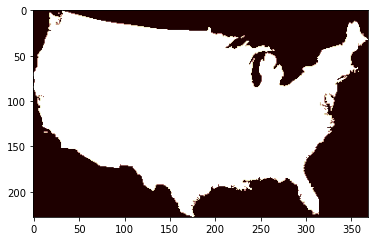

In [151]:
from matplotlib import pyplot

pyplot.imshow(rast_US.read(1), cmap = 'pink')
pyplot.show()

In [182]:
import rioxarray

rds = rioxarray.open_rasterio('US_data/BigUS/test.tif')
rds = rds.squeeze().drop("spatial_ref").drop("band")
rds.name = "data"
df_rast = rds.to_dataframe().reset_index()
# df_rast[df_rast.data >= 0.0].to_csv("out.csv", index=False)
df_rast

,y,x,data
0,3.163412e+06,-2343826.628,-3.400000e+38
1,3.163412e+06,-2331326.628,-3.400000e+38
2,3.163412e+06,-2318826.628,-3.400000e+38
3,3.163412e+06,-2306326.628,-3.400000e+38
4,3.163412e+06,-2293826.628,-3.400000e+38
...,...,...,...
84127,3.259117e+05,2206173.372,-3.400000e+38
84128,3.259117e+05,2218673.372,-3.400000e+38
84129,3.259117e+05,2231173.372,-3.400000e+38
84130,3.259117e+05,2243673.372,-3.400000e+38


In [165]:
len(df_rast['x'].unique())

369

In [ ]:
##### Merging LUT and raster dataste

In [180]:
df_lut = pd.read_csv("US_data/BigUS/lut.csv")

In [181]:
df_lut

,pm_id,pm_x,pm_y,cmaq_id,cmaq_x,cmaq_y,dist
0,04-013-0019,-1.482817e+06,1.283559e+06,54723,-1.484345e+06,1.282387e+06,1925.967057
1,04-013-4003,-1.478211e+06,1.273627e+06,54280,-1.472445e+06,1.270306e+06,6654.072553
2,04-013-9812,-1.481670e+06,1.276859e+06,54723,-1.484345e+06,1.282387e+06,6141.266558
3,04-013-9997,-1.478184e+06,1.285020e+06,54724,-1.472388e+06,1.282366e+06,6374.889667
4,06-073-1010,-1.955330e+06,1.288471e+06,54684,-1.950633e+06,1.282630e+06,7495.025393
...,...,...,...,...,...,...,...
1234,06-073-1008,-1.964893e+06,1.349647e+06,57347,-1.962413e+06,1.354858e+06,5770.836422
1235,04-015-1000,-1.556165e+06,1.530185e+06,63597,-1.554955e+06,1.524309e+06,5999.757810
1236,38-065-0002,-4.133485e+05,2.700053e+06,107203,-4.192249e+05,2.704266e+06,7230.651743
1237,41-011-1036,-2.245780e+06,2.601795e+06,103055,-2.247366e+06,2.602283e+06,1658.790048


In [183]:
df_rast = df_rast.rename({'data': 'cmaq_id'}, axis=1)  # new method

In [184]:
df_rast

,y,x,cmaq_id
0,3.163412e+06,-2343826.628,-3.400000e+38
1,3.163412e+06,-2331326.628,-3.400000e+38
2,3.163412e+06,-2318826.628,-3.400000e+38
3,3.163412e+06,-2306326.628,-3.400000e+38
4,3.163412e+06,-2293826.628,-3.400000e+38
...,...,...,...
84127,3.259117e+05,2206173.372,-3.400000e+38
84128,3.259117e+05,2218673.372,-3.400000e+38
84129,3.259117e+05,2231173.372,-3.400000e+38
84130,3.259117e+05,2243673.372,-3.400000e+38


In [185]:
df_rast_lut = pd.merge(df_rast, df_lut, on= ['cmaq_id'])

/Users/shrey/anaconda3/lib/python3.8/site-packages/pandas/core/reshape/merge.py:1092: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation
  right_keys.append(right.index)


In [186]:
df_rast_lut

,y,x,cmaq_id,pm_id,pm_x,pm_y,cmaq_x,cmaq_y,dist
0,3.138412e+06,-1931326.628,123061.0,53-073-0015,-1.940864e+06,3.133907e+06,-1.937046e+06,3.139816e+06,7035.680051
1,3.125912e+06,-2118826.628,122602.0,53-009-0013,-2.111719e+06,3.131456e+06,-2.117447e+06,3.128790e+06,6317.948449
2,3.100912e+06,-1843826.628,121737.0,53-073-0022,-1.843286e+06,3.103214e+06,-1.840453e+06,3.103987e+06,2937.041799
3,3.088412e+06,-1943826.628,121284.0,53-057-0015,-1.944134e+06,3.094499e+06,-1.948693e+06,3.092715e+06,4895.648436
4,3.063412e+06,-1993826.628,120392.0,53-009-0020,-2.002321e+06,3.064947e+06,-1.996647e+06,3.069262e+06,7127.875520
...,...,...,...,...,...,...,...,...,...
1135,4.509117e+05,1568673.372,25232.0,12-086-0033,1.577382e+06,4.517280e+05,1.573080e+06,4.529879e+05,4482.241886
1136,4.384117e+05,1581173.372,24789.0,12-086-1016,1.591110e+06,4.375876e+05,1.584701e+06,4.411957e+05,7355.104862
1137,3.884117e+05,1543673.372,22566.0,12-086-0030,1.551722e+06,3.862979e+05,1.547703e+06,3.837021e+05,4784.108280
1138,3.634117e+05,-231326.628,20641.0,48-215-0043,-2.308485e+05,3.553589e+05,-2.256897e+05,3.587932e+05,6197.374039


In [187]:
df_rast_lut['cmaq_id'].unique()

array([123061., 122602., 121737., ...,  22566.,  20641.,  19315.],
      dtype=float32)

In [ ]:
### It seems there are no common values between raster file & the LUT

In [ ]:
#### Raster 101

In [188]:
import rasterio

us_rast = rasterio.open('US_data/BigUS/test.tif')

In [190]:
img_name = us_rast.name
print('Image filename: {n}'.format(n=img_name))

Image filename: US_data/BigUS/test.tif


In [191]:
num_bands = us_rast.count
print('No. of bands: {n}'.format(n=num_bands))

No. of bands: 1


In [192]:
rows, cols = us_rast.shape
print('Image size is: {r} rows x {c} columns'.format(r=rows, c=cols))

Image size is: 228 rows x 369 columns


In [196]:
us_rast_tf = us_rast.transform
print('Transform:\n', us_rast_tf)

Transform:
 | 12500.00, 0.00,-2350076.63|
| 0.00,-12500.00, 3169661.74|
| 0.00, 0.00, 1.00|


In [198]:
print('Metadata:\n')
print(us_rast.meta)

Metadata:

{'driver': 'GTiff', 'dtype': 'float32', 'nodata': -3.3999999521443642e+38, 'width': 369, 'height': 228, 'count': 1, 'crs': None, 'transform': Affine(12500.0, 0.0, -2350076.628,
       0.0, -12500.0, 3169661.7449)}


In [203]:
us_shp = gpd.read_file("ShapeFolder/States_shapefile-shp/States_shapefile.shp")

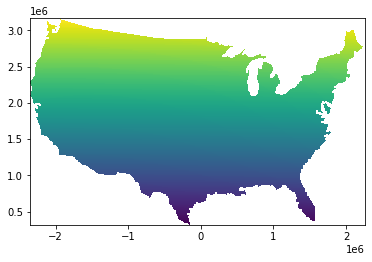

In [210]:
show(us_rast)

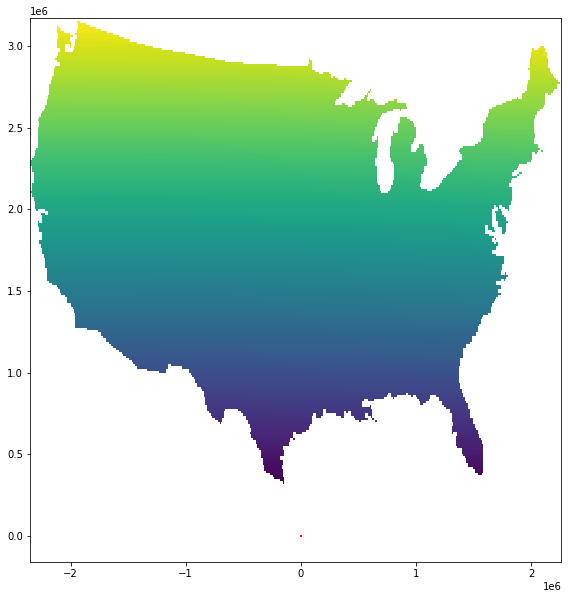

In [209]:
from rasterio.plot import show

fig, ax = plt.subplots(figsize = (10, 10))
base = show(us_rast, ax = ax)
us_shp.plot(ax = ax, edgecolor = 'red')

In [ ]:
###################### Making the GRID now ######################

In [103]:
import rasterio as rt
rast_us = rt.open('US_data/BigUS/test.tif')

In [105]:
rast_us.nodata

-3.3999999521443642e+38

In [106]:
rast_us_1 = rast_us.read(1)

In [108]:
rast_us_1[rast_us_1 == rast_us.nodata] = np.nan

In [109]:
rast_us_1

array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]], dtype=float32)

In [14]:
df_pm25small = pd.read_csv("US_data/BigUS/pm25small_lut.csv", index_col=None)
df_pm25small = df_pm25small.drop(['Unnamed: 0'], axis = 1)

<ipython-input-14-3276b0fa0dc7>:1: DtypeWarning: Columns (91,94,118) have mixed types. Specify dtype option on import or set low_memory=False.
  df_pm25small = pd.read_csv("US_data/BigUS/pm25small_lut.csv", index_col=None)


In [15]:
df_pm25small['cmaq_id'].unique()

array([ 55167,  54279,  55128, ..., 107203, 103055,  36692])

In [16]:
rast_us_1[4:7, 4:7]

array([[-3.4e+38, -3.4e+38, -3.4e+38],
       [-3.4e+38, -3.4e+38, -3.4e+38],
       [-3.4e+38, -3.4e+38, -3.4e+38]], dtype=float32)

In [101]:
N = 5
N_ = int(N/2)
print(N_)
for idval in df_pm25small['cmaq_id'].unique():
    row, col = np.where(rast_us_1 == idval)
    print(idval, row[0], col[0], rast_us_1[row, col][0])
    new_window = np.array(rast_us_1[row[0] -N_:row[0]+(N_+1), col[0]-N_:col[0]+(N_+1)])
    print(new_window)
    print('\n')

In [ ]:
############################### Creating the 3D grid [TESTING PHASE]###############################

In [24]:
df_pm25small = pd.read_csv("US_data/BigUS/pm25small_lut.csv", index_col=None)
df_pm25small = df_pm25small.drop(['Unnamed: 0'], axis = 1)

<ipython-input-24-3276b0fa0dc7>:1: DtypeWarning: Columns (91,94,118) have mixed types. Specify dtype option on import or set low_memory=False.
  df_pm25small = pd.read_csv("US_data/BigUS/pm25small_lut.csv", index_col=None)


In [25]:
df_pm25small.shape, df_BUS.shape

((80343, 155), (19639555, 77))

In [120]:
df_BUS.columns

Index(['year', 'day', 'cmaq_x', 'cmaq_y', 'elev', 'emissi11_pm25',
       'forest_cover', 'high', 'limi', 'local', 'is', 'pd', 'lon', 'lat',
       'rid', 'elev_k', 'emissi11_pm25_k', 'emissi11_pm10_k', 'forest_cover_k',
       'high_k', 'limi_k', 'local_k', 'is_k', 'pd_k', 'cmaq_id',
       'nldas_pevapsfc', 'nldas_dlwrfsfc', 'nldas_dswrfsfc', 'nldas_cape',
       'nldas_fpcsfc', 'nldas_pcpsfc', 'nldas_rh2m', 'nldas_tmp2m',
       'nldas_vgrd10m', 'nldas_ugrd10m', 'nldas_pressfc', 'narr_dpt',
       'narr_vis', 'narr_hpbl', 'narr_rh2m', 'narr_tmp2m', 'narr_ugrd10m',
       'narr_vgrd10m', 'narr_rh30mb', 'narr_rh63mb', 'narr_rh96mb',
       'narr_rh129mb', 'narr_rh1512mb', 'narr_rh1815mb', 'narr_tmp30mb',
       'narr_tmp63mb', 'narr_tmp96mb', 'narr_tmp129mb', 'narr_tmp1512mb',
       'narr_tmp1815mb', 'narr_ugrd30m', 'narr_ugrd30mb', 'narr_ugrd63mb',
       'narr_ugrd96mb', 'narr_ugrd129mb', 'narr_ugrd1512mb', 'narr_ugrd1815mb',
       'narr_vgrd30m', 'narr_vgrd30mb', 'narr_vgrd63mb',

In [123]:
df_pm25small.columns

Index(['year', 'day', 'pm_id', 'pm_x', 'pm_y', 'elev', 'emissi11_nh3',
       'emissi11_nox', 'emissi11_pm10', 'emissi11_pm25',
       ...
       'high_k', 'limi_k', 'local_k', 'is_k', 'pd_k', 'pm25_value_k', 'cmaq_x',
       'cmaq_y', 'cmaq_id', 'dist'],
      dtype='object', length=155)

In [31]:
testarr = [[56053., 56054., 56055., 56056., 56057.], 
           [55609., 55610., 55611., 55612., 55613.],
           [55165., 55166., 55167., 55168., 55169.],
           [54277., 54278., 54279., 54280., 54281.],
           [53833., 53834., 53835., 53836., 53837.]]

testarr = np.array(testarr)
testarr

# newarr = [5x5]

# for each 'colname':
#     for each item at indx (x,y) in testarr find cmaq id match in big_df['colname'] with indx (i,j):
#         add val(i,j) to newarr at idx (x,y)
    

array([[56053., 56054., 56055., 56056., 56057.],
       [55609., 55610., 55611., 55612., 55613.],
       [55165., 55166., 55167., 55168., 55169.],
       [54277., 54278., 54279., 54280., 54281.],
       [53833., 53834., 53835., 53836., 53837.]])

In [40]:
new_test = np.ones((5, 5))
new_test

array([[1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.]])

In [67]:
df_BUS_1 = df_BUS[df_BUS['day'] == 1]
df_BUS_1 = df_BUS_1.reset_index(drop = True)
df_BUS_1

,year,day,cmaq_x,cmaq_y,elev,emissi11_pm25,forest_cover,high,limi,local,...,narr_vgrd1512mb,narr_vgrd1815mb,narr_tmp30m,narr_pres2m,narr_pres10m,narr_pres30m,aod_value,pm25_value,gc_aod,pm25_value_k
0,2011,1,-1.546318e+05,3.231663e+05,10.23680,0.0,0.039216,0.000000,0.000000,831.897438,...,-3.889840,-3.402230,298.071,98985.8,98882.1,98706.3,NaN,NaN,0.042317,7.278867
1,2011,1,-1.427332e+05,3.230424e+05,4.38882,0.0,0.007346,0.000000,0.000000,1634.444946,...,-3.889840,-3.402230,298.071,98985.8,98882.1,98706.3,NaN,NaN,0.042317,7.111352
2,2011,1,-1.783152e+05,3.350347e+05,17.82310,0.0,0.106520,1078.597982,0.000000,306.127464,...,-1.387240,0.222773,294.696,101352.0,101249.0,101040.0,NaN,NaN,0.023270,7.721335
3,2011,1,-1.664153e+05,3.349110e+05,12.61300,0.0,0.047750,0.000000,0.000000,0.000000,...,-1.173700,0.379023,295.571,101419.0,101315.0,101073.0,NaN,NaN,0.042317,7.491351
4,2011,1,-1.545156e+05,3.347886e+05,8.23616,0.0,0.211230,0.000000,0.000000,1009.069365,...,-1.173700,0.379023,295.571,101419.0,101315.0,101073.0,NaN,NaN,0.042317,7.282235
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53802,2011,1,-1.949187e+06,3.151649e+06,20.80090,0.0,0.038567,0.000000,638.847016,1318.192756,...,1.110160,1.756630,287.446,101252.0,101149.0,100906.0,NaN,NaN,0.005140,14.281443
53803,2011,1,-1.937151e+06,3.151584e+06,14.53420,0.0,0.037649,0.000000,0.000000,0.000000,...,1.110160,1.756630,287.446,101252.0,101149.0,100906.0,NaN,NaN,0.005140,14.270270
53804,2011,1,-1.925112e+06,3.151519e+06,20.15010,0.0,0.047237,75.654009,0.000000,0.000000,...,1.110160,1.756630,287.446,101252.0,101149.0,100906.0,NaN,NaN,0.001153,14.258825
53805,2011,1,-1.913073e+06,3.151452e+06,181.00500,0.0,0.853806,0.000000,0.000000,0.000000,...,0.644012,1.535270,286.154,97019.2,96915.4,96673.0,NaN,NaN,0.001153,14.247107


In [ ]:
df_pm25small_1 = df_pm25small[df_pm25small['day'] == 1]
df_pm25small_1 = df_pm25small_1.reset_index(drop = True)
# df_pm25small_1[['year', 'day', 'cmaq_id', 'cmaq_x', 'cmaq_y', 'pm_id']]
df_pm25small_1

In [ ]:
for i in range(5):
    for j in range(5):
        if i == 2 and j == 2:
            match_cmaq = testarr[i,j]
            loc_val = df_pm25small_1.loc[df_pm25small_1['cmaq_id'] == match_cmaq, 'aod_value']
            print(loc_val[0], (i,j), match_cmaq)
            print("\n")
            print("------------")
            print("\n")
            new_test[i,j] = loc_val[0]
        else:
            match_cmaq = testarr[i,j]
            loc_val_df = df_BUS_1[df_BUS_1['cmaq_id'] == match_cmaq]
            loc_val = loc_val_df['aod_value']
            print(loc_val, (i,j))
            print("\n")
            print("------------")
            print("\n")
            new_test[i,j] = loc_val

new_test

In [ ]:
##################################### GRID DATASET #####################################

In [39]:
#### import small training dataset
df_pm25small = pd.read_csv("US_data/BigUS/pm25small_lut.csv", index_col=None)
df_pm25small = df_pm25small.drop(['Unnamed: 0'], axis = 1)

<ipython-input-39-dfd3f0f990a3>:2: DtypeWarning: Columns (91,94,118) have mixed types. Specify dtype option on import or set low_memory=False.
  df_pm25small = pd.read_csv("US_data/BigUS/pm25small_lut.csv", index_col=None)


In [51]:
df_small_fs = df_pm25small[['day', 'pm_x', 'pm_y', 'cmaq_id','elev', 'forest_cover', 'pd', 'local', 'limi', 'high', 'is', 'nldas_pevapsfc', 'nldas_pressfc', 'nldas_cape',
                            'nldas_ugrd10m', 'nldas_vgrd10m', 'nldas_tmp2m', 'nldas_rh2m', 'nldas_dlwrfsfc', 'nldas_dswrfsfc', 'nldas_pcpsfc', 'nldas_fpcsfc',
                            'aod_value', 'emissi11_pm25',]]

In [83]:
df_pm25small['pm25_value']

0        99.1
1        13.2
2        18.1
3        20.3
4        22.6
         ... 
80338     5.8
80339     7.9
80340     5.7
80341     7.5
80342    16.5
Name: pm25_value, Length: 80343, dtype: float64

In [52]:
######### For Day 1 #########
df_small_fs_1 = df_small_fs[df_small_fs['day'] == 1]
df_small_fs_1 = df_small_fs_1.reset_index(drop = True)
# df_pm25small_1[['year', 'day', 'cmaq_id', 'cmaq_x', 'cmaq_y', 'pm_id']]
df_small_fs_1.shape

(46, 24)

In [44]:
#### import big US dataset
df_BUS_1 = pd.read_csv("US_data/BigUS/n_aod_pred_2011_new10_1.csv")
df_BUS_2 = pd.read_csv("US_data/BigUS/n_aod_pred_2011_new10_2.csv")
df_BUS_3 = pd.read_csv("US_data/BigUS/n_aod_pred_2011_new10_3.csv")
df_BUS_4 = pd.read_csv("US_data/BigUS/n_aod_pred_2011_new10_4.csv")
df_BUS_5 = pd.read_csv("US_data/BigUS/n_aod_pred_2011_new10_5.csv")
df_BUS_6 = pd.read_csv("US_data/BigUS/n_aod_pred_2011_new10_6.csv")
df_BUS_7 = pd.read_csv("US_data/BigUS/n_aod_pred_2011_new10_7.csv")
df_BUS_8 = pd.read_csv("US_data/BigUS/n_aod_pred_2011_new10_8.csv")
df_BUS_9 = pd.read_csv("US_data/BigUS/n_aod_pred_2011_new10_9.csv")
df_BUS_10 = pd.read_csv("US_data/BigUS/n_aod_pred_2011_new10_10.csv")
df_BUS_11 = pd.read_csv("US_data/BigUS/n_aod_pred_2011_new10_11.csv")
df_BUS_12 = pd.read_csv("US_data/BigUS/n_aod_pred_2011_new10_12.csv")

In [45]:
df_BUS = pd.concat([df_BUS_1, df_BUS_2, df_BUS_3, df_BUS_4, df_BUS_5, df_BUS_6, df_BUS_7, df_BUS_8, df_BUS_9, df_BUS_10, df_BUS_11, df_BUS_12], ignore_index = True)

In [49]:
df_BUS

,year,day,cmaq_x,cmaq_y,elev,emissi11_pm25,forest_cover,high,limi,local,...,narr_vgrd1512mb,narr_vgrd1815mb,narr_tmp30m,narr_pres2m,narr_pres10m,narr_pres30m,aod_value,pm25_value,gc_aod,pm25_value_k
0,2011,1,-1.546318e+05,3.231663e+05,10.23680,0.0,0.039216,0.000000,0.000000,831.897438,...,-3.88984,-3.402230,298.071,98985.8,98882.1,98706.3,NaN,NaN,0.042317,7.278867
1,2011,1,-1.427332e+05,3.230424e+05,4.38882,0.0,0.007346,0.000000,0.000000,1634.444946,...,-3.88984,-3.402230,298.071,98985.8,98882.1,98706.3,NaN,NaN,0.042317,7.111352
2,2011,1,-1.783152e+05,3.350347e+05,17.82310,0.0,0.106520,1078.597982,0.000000,306.127464,...,-1.38724,0.222773,294.696,101352.0,101249.0,101040.0,NaN,NaN,0.023270,7.721335
3,2011,1,-1.664153e+05,3.349110e+05,12.61300,0.0,0.047750,0.000000,0.000000,0.000000,...,-1.17370,0.379023,295.571,101419.0,101315.0,101073.0,NaN,NaN,0.042317,7.491351
4,2011,1,-1.545156e+05,3.347886e+05,8.23616,0.0,0.211230,0.000000,0.000000,1009.069365,...,-1.17370,0.379023,295.571,101419.0,101315.0,101073.0,NaN,NaN,0.042317,7.282235
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19639550,2011,365,-1.949187e+06,3.151649e+06,20.80090,0.0,0.038567,0.000000,638.847016,1318.192756,...,5.30925,4.808970,289.203,101356.0,101252.0,101043.0,NaN,NaN,0.028647,11.660047
19639551,2011,365,-1.937151e+06,3.151584e+06,14.53420,0.0,0.037649,0.000000,0.000000,0.000000,...,5.30925,4.808970,289.203,101356.0,101252.0,101043.0,NaN,NaN,0.028647,11.575479
19639552,2011,365,-1.925112e+06,3.151519e+06,20.15010,0.0,0.047237,75.654009,0.000000,0.000000,...,5.30925,4.808970,289.203,101356.0,101252.0,101043.0,NaN,NaN,0.024560,11.489751
19639553,2011,365,-1.913073e+06,3.151452e+06,181.00500,0.0,0.853806,0.000000,0.000000,0.000000,...,5.64258,5.223030,286.370,97089.3,96985.6,96743.3,NaN,NaN,0.024560,11.403044


In [54]:
df_BUS_fs = df_BUS[['day', 'cmaq_x', 'cmaq_y', 'cmaq_id', 'elev', 'forest_cover', 'pd', 'local', 'limi', 'high', 'is', 'nldas_pevapsfc', 'nldas_pressfc', 'nldas_cape',
                            'nldas_ugrd10m', 'nldas_vgrd10m', 'nldas_tmp2m', 'nldas_rh2m', 'nldas_dlwrfsfc', 'nldas_dswrfsfc', 'nldas_pcpsfc', 'nldas_fpcsfc',
                            'aod_value', 'emissi11_pm25']]

In [8]:
######### For Day 1 #########
df_BUS_fs_1 = df_BUS_fs[df_BUS_fs['day'] == 1]
df_BUS_fs_1 = df_BUS_fs_1.reset_index(drop = True)
df_BUS_fs_1.shape

(53807, 24)

In [11]:
#### import the rasterio file
import rasterio as rt
rast_us = rt.open('US_data/BigUS/test.tif')

In [12]:
rast_us_1 = rast_us.read(1)
rast_us_1[rast_us_1 == rast_us.nodata] = np.nan

In [13]:
rast_us_1

array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]], dtype=float32)

In [145]:
columnarr = np.copy(rast_us_1)
columnarr.shape

(228, 369)

In [9]:
finarr = np.ones((5,5,22))

In [ ]:
# f = open('3dcsv.txt','w')

#     finarr = np.dstack((finarr,featarr))
### Changing the 3d array to a 2d array
#     featarrReshaped = featarr.reshape(featarr.shape[0], -1)
#     np.savetxt(f, featarrReshaped, delimiter=",")
#     print(featarrReshaped.shape)
#     featarrOrig = featarrReshaped.reshape(featarrReshaped.shape[0], featarrReshaped.shape[1] // featarr.shape[2], featarr.shape[2])
#     print(featarrOrig.shape)
#     print("\n\n")



In [16]:
# Create your dictionary class
class my_dictionary(dict):
 
  # __init__ function
  def __init__(self):
    self = dict()
 
  # Function to add key:value
  def add(self, key, value):
    self[key] = value
 

In [101]:
N = 5
N_ = int(N/2)


input_data_dict = my_dictionary()
label_data_dict = my_dictionary()
key = 0
targetlist = []
traininglist = []


# fgrid = open('US_data/BigUS/grid3d.npy', 'ab+')


for idx, rowval in df_small_fs_1.iterrows(): ### iterate over each row
    featarr = np.ones((5, 5))
    sumavg = 0
    for colname in df_small_fs_1: ###iterate over every column
#         print(colname)
        if colname == 'cmaq_id' or colname == 'pm_x' or colname == 'pm_y':
            continue
        elif colname == 'emissi11_pm25':
            targetarr = np.ones((5, 5))
            cmaqval = rowval['cmaq_id']
            row, col = np.where(rast_us_1 == cmaqval)
            cmaqgrid = np.array(rast_us_1[row[0] - N_:row[0]+(N_+1), col[0]- N_:col[0]+(N_+1)])
            targetarr[2,2] = rowval[colname]
            for i in range(5): ## Add values element-wise 
                for j in range(5):
                    if i == 2 and j == 2:
                        continue
                    else:
                        match_cmaq = cmaqgrid[i,j]
                        if np.isnan(match_cmaq):
                            targetarr[i,j] = match_cmaq
                        else:
                            locval_df = df_BUS_fs_1[df_BUS_fs_1['cmaq_id'] == match_cmaq]
                            locval = locval_df[colname]
                            sumavg = sumavg + locval
                            targetarr[i,j] = locval              
        else:
            temparr = np.ones((5, 5))
            cmaqval = rowval['cmaq_id']
            row, col = np.where(rast_us_1 == cmaqval)
            cmaqgrid = np.array(rast_us_1[row[0] - N_:row[0]+(N_+1), col[0]- N_:col[0]+(N_+1)])
            temparr[2,2] = rowval[colname]
            for i in range(5): ## Add values element-wise 
                for j in range(5):
                    if i == 2 and j == 2:
                        continue
                    else:
                        match_cmaq = cmaqgrid[i,j]
                        if np.isnan(match_cmaq):
                            temparr[i,j] = match_cmaq
                        else:
                            locval_df = df_BUS_fs_1[df_BUS_fs_1['cmaq_id'] == match_cmaq]
                            locval = locval_df[colname]
                            temparr[i,j] = locval
        featarr = np.dstack((featarr,temparr))
    
    featarr = np.delete(featarr, (0), axis=2)
    sumavg = sumavg/21.0
    targetlist.append(sumavg)
    traininglist.append(featarr)
#     np.save(fgrid, featarr)
    input_data_dict.add(key, featarr)
    label_data_dict.add(key, targetarr)
    key = key + 1      

In [112]:
## convert list to numpy array

trainingarr = np.array(traininglist)
targetarr = np.array(targetlist)

<ipython-input-112-88a2b2ffe770>:4: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  targetarr = np.array(targetlist)


In [113]:
###### train-test split

X_train, X_test, y_train, y_test = train_test_split(trainingarr, targetarr, test_size = 0.33, random_state=42)

In [128]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((30, 5, 5, 21), (16, 5, 5, 21), (30,), (16,))

In [126]:
def grid_data_transform(data):
    data_t = []
    for i in range(data.shape[0]):
        data_t.append(data[i].reshape(30, 5, 5, 21))
    return np.asarray(data_t, dtype=np.float32)

In [129]:
X_train = X_train.reshape(30, 5, 5, 21)
X_test = X_test.reshape(16, 5, 5, 21)

In [130]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((30, 5, 5, 21), (16, 5, 5, 21), (30,), (16,))

In [99]:
loaded_grid = np.load('US_data/BigUS/grid3d.npy')

In [100]:
for grids in loaded_grid:
    print(grids.shape)

(5, 21)
(5, 21)
(5, 21)
(5, 21)
(5, 21)


In [58]:
### Accessing elements of the dictionary
input_data_dict[1][:,:,21] ## Accessing 2nd elements, all rows, all columns, last slice.

array([[0.0225  , 0.02675 , 0.026666, 0.0546  , 0.0294  ],
       [0.031   , 0.069833, 0.091666, 0.0706  , 0.03525 ],
       [0.03525 , 0.03425 , 0.06175 , 0.06175 , 0.06425 ],
       [0.035   , 0.027333, 0.028   , 0.047333, 0.058666],
       [0.0445  , 0.051   , 0.051   , 0.0605  , 0.0605  ]])

In [78]:
input_data_dict[1].shape

(5, 5, 22)

In [61]:
label_data_dict[1].shape

(5, 5)

In [62]:
len(input_data_dict), len(label_data_dict)

(46, 46)

In [245]:
### how to use np.reshape
Y = np.arange(16).reshape(4,4)
print(Y)
Y[np.ix_([0,3],[0,3])]

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]]


array([[ 0,  3],
       [12, 15]])

In [ ]:
########## Trying Yongbee's Code ##########

In [36]:
data_file = np.load('US_data/BigUS/v10_170713_5x5_include_na_label.npz')

In [41]:
data_file['arr_0'].shape

(249000,)

In [2]:
import util
data, label = util.load_data(model.DATA_PATH, model.LABEL_PATH)
print(data.shape)
print(label.shape)

data_file = np.load('US_data/BigUS/5x5_sample_dataset.npz')
label_file = np.load('US_data/BigUS/5x5_sample_label.npz')

In [4]:
data_file

In [113]:
data_file = np.load('PM_target_data_Taesup/PM2015_2018.npz')

In [115]:
data_file['arr_0']

array([[1.17826087e+01, 8.77060000e+04, 2.01500000e+03, ...,
                   nan,            nan,            nan],
       [8.95652174e+00, 8.81700000e+04, 2.01500000e+03, ...,
                   nan,            nan,            nan],
       [1.12608696e+01, 8.86140000e+04, 2.01500000e+03, ...,
                   nan,            nan,            nan],
       ...,
       [1.54583333e+01, 1.25189000e+05, 2.01800000e+03, ...,
                   nan,            nan,            nan],
       [9.08333333e+00, 1.25648000e+05, 2.01800000e+03, ...,
                   nan,            nan,            nan],
       [1.30833333e+01, 1.27041000e+05, 2.01800000e+03, ...,
                   nan,            nan,            nan]])

In [116]:
data_file_WAOD = np.load('PM_target_data_Taesup/PM2015_2018_WAOD.npz')

In [117]:
data_file_WAOD['arr_0']

array([[ 1.17826087e+01,  8.77060000e+04,  2.01500000e+03, ...,
        -1.77706279e+01,  0.00000000e+00,  2.33022293e-01],
       [ 8.95652174e+00,  8.81700000e+04,  2.01500000e+03, ...,
        -1.78788293e+01,  0.00000000e+00,  2.32440802e-01],
       [ 1.12608696e+01,  8.86140000e+04,  2.01500000e+03, ...,
        -1.84955266e+01,  2.29144732e-04,  2.35225356e-01],
       ...,
       [ 1.54583333e+01,  1.25189000e+05,  2.01800000e+03, ...,
        -2.92419470e+00,  1.02296341e-01,  1.30176037e-01],
       [ 9.08333333e+00,  1.25648000e+05,  2.01800000e+03, ...,
        -4.05545699e+00,  3.85901479e-02,  1.29854641e-01],
       [ 1.30833333e+01,  1.27041000e+05,  2.01800000e+03, ...,
        -1.29868452e+00,  7.44528825e-02,  1.28539694e-01]])

In [ ]:
###################### Running the CNN model ######################

In [151]:
from keras.models import Sequential, load_model, Model
from keras.layers import Input, Dense, Activation, Conv2D, Dropout, Flatten
from keras import optimizers, utils, initializers, regularizers
import keras.backend as K
import random
import os

fold = 10
epochs = 200
tr_batch_size = 30
ev_batch_size = 100
Input_width = 5
Input_height = 5
num_channels = 21
noise_std = 0.1

n_conv = 64
n_hidden = 128

SEED_NUM = 30000

modelPM25 = Sequential([
Conv2D(n_conv, (3,3), kernel_initializer = initializers.TruncatedNormal(mean=0.0, stddev=0.1, seed=SEED_NUM), bias_initializer=initializers.Constant(0.1), input_shape=(Input_width, Input_height, num_channels), padding='same'),
Activation('relu'),
Flatten(),
Dropout(0.5, seed = SEED_NUM),
Dense(n_hidden, activation = 'elu', kernel_initializer = initializers.TruncatedNormal(mean = 0.0, stddev = 0.1, seed = SEED_NUM), bias_initializer=initializers.Constant(0.1)),
Dense(1, activation='linear')
])

nadam = optimizers.Nadam(lr=0.0002, beta_1=0.9, beta_2=0.999, epsilon=None, schedule_decay=0.004)

modelPM25.compile(optimizer=nadam, loss='mse', metrics=['mae'])

In [133]:
### 1-shot learning for the CNN
x_train = input_data_dict[3].reshape(1, Input_width, Input_height, num_channels)
y_train = np.array([7.5])

x_test = input_data_dict[5].reshape(1, Input_width, Input_height, num_channels)

modelPM25.fit(x_train, y_train, epochs = 1, batch_size = tr_batch_size, verbose = 1)
pred = modelPM25.predict(x_test, batch_size = 1).reshape(len(x_test),)

In [137]:
X_train = np.nan_to_num(X_train)
y_train = np.nan_to_num(y_train)

In [156]:
X_train = X_train[:1]
y_train = y_train[:1]

In [157]:
X_train.shape, y_train.shape

((1, 5, 5, 21), (1,))

In [158]:
X_train = X_train.reshape(1, Input_width, Input_height, num_channels)
X_train.shape

(1, 5, 5, 21)

In [160]:
X_train

array([[[[ 1.00000000e+00,  4.06499000e+02,  8.36547000e-01,
           7.19218943e+00,  0.00000000e+00,  0.00000000e+00,
           0.00000000e+00,  5.60146924e-02,  3.94329000e-01,
           9.76831000e+04,  0.00000000e+00, -9.24286000e-01,
          -5.14571000e+00,  2.81701000e+02,  3.28030000e+01,
           2.48367000e+02,  4.07197000e+02,  0.00000000e+00,
           0.00000000e+00, -1.16600000e-02, -1.16600000e-02],
         [ 1.00000000e+00,  3.34633000e+02,  5.47291000e-01,
           3.87271852e+01,  0.00000000e+00,  0.00000000e+00,
           0.00000000e+00,  7.47474747e-01,  3.94443000e-01,
           9.83814000e+04,  0.00000000e+00, -7.54286000e-01,
          -5.03714000e+00,  2.82039000e+02,  3.28791000e+01,
           2.49947000e+02,  4.01316000e+02,  0.00000000e+00,
           0.00000000e+00, -8.50000000e-03, -8.50000000e-03],
         [ 1.00000000e+00,  2.95101000e+02,  4.91276000e-01,
           3.56492454e+01,  1.00082434e+03,  0.00000000e+00,
           0.00000000e

In [159]:
modelPM25.fit(X_train, y_train, epochs = 1, batch_size = 1, verbose = 1)

ValueError: Failed to convert a NumPy array to a Tensor (Unsupported object type Series).

In [ ]:
for x in range(0,30):
    model.fit(input_data_dict[, input_data_dict, epochs = 1, batch_size=tr_batch_size, verbose=1)
# pred = model.predict(x_val, batch_size = ev_batch_size).reshape(len(x_val),)
# val_r2 = 1 - (np.sum(np.square(y_val - pred)) / np.sum(np.square(y_val - np.mean(y_val))))
# print("epoch:{}, validation set r-squared:{}".format(epoch, val_r2))


In [ ]:
>>> Rearrange columns so that features are a single dataset and labels are different dataset
>>> How should you feed numpy array of 2d elments into a CNN.

In [ ]:
#### Questions Remaining
>>> PM 2.5 values are missing in the larger dataset.